In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
logs_dir = r"C:\Users\MQTyor\ai_pc\Skoltech-ai-courses\DSP-project\Iternal-GAFL\docker_shared\GAFL\logs"

In [3]:
# list(zip(*event_acc.Scalars("F1Score_BvsM/val")))

In [4]:
events_dd = {}

for filename in os.listdir(logs_dir):
    events_dd[filename] = EventAccumulator(os.path.join(logs_dir, filename))
    
for event_acc in events_dd.values():
    event_acc.Reload();

In [5]:
cols_df = next(iter(events_dd.values())).Tags()['scalars']
cols_df

['loss/train',
 'F1Score_NvsB/train',
 'F1Score_BvsM/train',
 'loss/val',
 'F1Score_NvsB/val',
 'F1Score_BvsM/val']

In [6]:
logs_dd = {}
logs_df = {}

for name, event in events_dd.items():
    logs_dd[name] = {}
    for col_ in cols_df:
        logs_dd[name][col_] = list(map(lambda x: x.value, event.Scalars(col_)))


In [7]:
for key, val in logs_dd.items():
    logs_df[key] = pd.DataFrame(data=val)

In [8]:
logs_df['ResNet_adaptive_[[0, 1, 2, 3], []]_general_spectrum']

loss/train  F1Score_NvsB/train  F1Score_BvsM/train  loss/val  \
0     1.057745            0.248366            0.557457  1.262693   
1     0.947223            0.431718            0.625268  0.899455   
2     0.963556            0.427861            0.608295  1.012650   
3     0.899133            0.454936            0.619590  0.831941   
4     0.865470            0.547826            0.616114  1.281591   
5     0.770547            0.588235            0.669903  1.374969   
6     0.688733            0.697872            0.692124  0.718045   
7     0.716086            0.646809            0.650831  0.564899   
8     0.593731            0.771930            0.681592  0.936094   
9     0.548501            0.769231            0.712531  0.662573   
10    0.484648            0.803419            0.751269  2.244184   
11    0.423020            0.864629            0.784211  0.546401   
12    0.396169            0.855856            0.798913  0.806537   
13    0.316016            0.878924            0.834688  0.509940   
14    0.229272            0.959641            0.857924  0.521869   
15    0.278301            0.894977            0.883853  0.975429   
16    0.282375            0.871111            0.849462  0.553941   
17    0.181622            0.920930            0.942197  0.623068   
18    0.166520            0.953271            0.942529  0.791657   
19    0.227556            0.959276            0.897143  0.957761   
20    0.109962            0.953271            0.948571  0.656279   
21    0.092723            0.990826            0.946746  0.548522   
22    0.081772            0.962617            0.985423  0.601298   
23    0.062419            0.990826            0.979351  0.607941   
24    0.131794            0.972222            0.947059  0.671141   

    F1Score_NvsB/val  F1Score_BvsM/val  
0           0.356589          0.493827  
1           0.000000          0.679245  
2           0.500000          0.537931  
3           0.641509          0.527778  
4           0.383562          0.516129  
5           0.076923          0.490798  
6           0.344828          0.628571  
7           0.800000          0.684932  
8           0.322581          0.696429  
9           0.754717          0.728972  
10          0.400000          0.471429  
11          0.826087          0.813953  
12          0.741935          0.672269  
13          0.829268          0.781609  
14          0.818182          0.782609  
15          0.837209          0.735294  
16          0.830189          0.730769  
17          0.687500          0.737864  
18          0.628571          0.666667  
19          0.698413          0.655462  
20          0.741935          0.757282  
21          0.846154          0.757895  
22          0.808511          0.804878  
23          0.823529          0.772727  
24          0.785714          0.770833

In [9]:
len(logs_df)

61

### Let's find the best binary F1 scores on validation for each model 

In [10]:
cols_f1 = ('F1Score_NvsB/val', 'F1Score_BvsM/val')
cols_loss = ('loss/val', 'loss/train')

In [11]:
model_names = []
max_scores_dd = {key_:[] for key_ in cols_f1}
    
for model_name_, df_ in logs_df.items():
    model_names.append(model_name_)
    for col_val_ in cols_f1:
        max_scores_dd[col_val_].append(df_[col_val_].max())

In [12]:
df_max_scores = pd.DataFrame(data=max_scores_dd)
df_max_scores.index = (model_names)

In [36]:
df_max_scores.sort_values('F1Score_NvsB/val', ascending=0).head(30)

F1Score_NvsB/val  \
ResNet_adaptive_[[0, 3], []]_spectrum_log                 0.920000   
ResNet_adaptive_[[1, 2, 3], []]_spectrum                  0.913043   
ResNet_adaptive_[[0, 3], []]_spectrum                     0.913043   
ResNet_adaptive_[[2], []]_spectrum                        0.913043   
ResNet_adaptive_[[0, 2], []]_general_spectrum             0.913043   
ResNet_adaptive_[[1, 2, 3], []]_spectrum_log              0.909091   
ResNet_adaptive_[[1, 2], []]_phase                        0.901961   
ResNet_adaptive_[[0, 1], []]_spectrum                     0.897959   
ResNet_adaptive_[[0, 1, 2, 3], []]_spectrum_log           0.893617   
ResNet_adaptive_[[0, 2], []]_spectrum_log                 0.893617   
ResNet_adaptive_[[1, 3], []]_spectrum                     0.883721   
ResNet_adaptive_[[0, 2], []]_phase                        0.880000   
ResNet_adaptive_[[3], []]_spectrum_log                    0.880000   
ResNet_adaptive_[[0, 2, 3], []]_general_spectrum          0.875000   
ResNet_adaptive_[[0, 2, 3], []]_spectrum                  0.875000   
ResNet_adaptive_[[0, 1, 2], []]_spectrum                  0.869565   
ResNet_adaptive_[[0, 1], []]_spectrum_log                 0.869565   
ResNet_adaptive_[[0], []]_spectrum_log                    0.869565   
ResNet_adaptive_[[2, 3], []]_general_spectrum             0.869565   
ResNet_adaptive_[[1, 3], []]_general_spectrum             0.863636   
ResNet_adaptive_[[0, 1, 3], []]_phase                     0.863636   
ResNet_adaptive_[[0, 2], []]_spectrum                     0.857143   
ResNet_adaptive_[[1, 2], []]_spectrum_log                 0.857143   
ResNet_adaptive_[[0, 2, 3], []]_phase                     0.857143   
ResNet_adaptive_[[3], []]_phase                           0.857143   
ResNet_adaptive_[[0, 2, 3], []]_spectrum_log              0.857143   
ResNet_adaptive_[[1], []]_spectrum                        0.851064   
ResNet_adaptive_[[3], []]_spectrum                        0.851064   
ResNet_adaptive_[[2, 3], []]_spectrum                     0.851064   
ResNet_adaptive_[[0, 1, 3], []]_spectrum_log              0.851064   

                                                  F1Score_BvsM/val  
ResNet_adaptive_[[0, 3], []]_spectrum_log                 0.833333  
ResNet_adaptive_[[1, 2, 3], []]_spectrum                  0.800000  
ResNet_adaptive_[[0, 3], []]_spectrum                     0.837209  
ResNet_adaptive_[[2], []]_spectrum                        0.838710  
ResNet_adaptive_[[0, 2], []]_general_spectrum             0.869565  
ResNet_adaptive_[[1, 2, 3], []]_spectrum_log              0.825000  
ResNet_adaptive_[[1, 2], []]_phase                        0.800000  
ResNet_adaptive_[[0, 1], []]_spectrum                     0.891566  
ResNet_adaptive_[[0, 1, 2, 3], []]_spectrum_log           0.894118  
ResNet_adaptive_[[0, 2], []]_spectrum_log                 0.809524  
ResNet_adaptive_[[1, 3], []]_spectrum                     0.777778  
ResNet_adaptive_[[0, 2], []]_phase                        0.795918  
ResNet_adaptive_[[3], []]_spectrum_log                    0.868421  
ResNet_adaptive_[[0, 2, 3], []]_general_spectrum          0.835165  
ResNet_adaptive_[[0, 2, 3], []]_spectrum                  0.846154  
ResNet_adaptive_[[0, 1, 2], []]_spectrum                  0.794521  
ResNet_adaptive_[[0, 1], []]_spectrum_log                 0.837209  
ResNet_adaptive_[[0], []]_spectrum_log                    0.800000  
ResNet_adaptive_[[2, 3], []]_general_spectrum             0.844444  
ResNet_adaptive_[[1, 3], []]_general_spectrum             0.823529  
ResNet_adaptive_[[0, 1, 3], []]_phase                     0.831461  
ResNet_adaptive_[[0, 2], []]_spectrum                     0.826087  
ResNet_adaptive_[[1, 2], []]_spectrum_log                 0.831461  
ResNet_adaptive_[[0, 2, 3], []]_phase                     0.850575  
ResNet_adaptive_[[3], []]_phase                           0.747253  
ResNet_adaptive_[[0, 2, 3], []]_spectrum_log              0.843373  
ResNet_adaptive_

In [35]:
df_max_scores.loc['ResNet']

F1Score_NvsB/val    0.833333
F1Score_BvsM/val    0.750000
Name: ResNet, dtype: float64

In [14]:
"""
f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
f'ResNet_adaptive_[[{depth_}], []]_phase',
f'ResNet_adaptive_[[{depth_}], []]_spectrum',
f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
"""

"\nf'ResNet_adaptive_[[{depth_}], []]_general_spectrum',\nf'ResNet_adaptive_[[{depth_}], []]_phase',\nf'ResNet_adaptive_[[{depth_}], []]_spectrum',\nf'ResNet_adaptive_[[{depth_}], []]_spectrum_log',\n"

In [15]:
from itertools import combinations
com_gafls = list(combinations(range(4), 3))
com_gafls = [ str(val)[1:-1] for val in com_gafls]
com_gafls

['0, 1, 2', '0, 1, 3', '0, 2, 3', '1, 2, 3']

In [16]:
masks = [f'ResNet_adaptive_[[{comb_}], []]_general_spectrum' for comb_ in com_gafls]

In [17]:
df_max_scores.loc[masks].mean()

F1Score_NvsB/val    0.838452
F1Score_BvsM/val    0.823512
dtype: float64

In [18]:
masks

['ResNet_adaptive_[[0, 1, 2], []]_general_spectrum',
 'ResNet_adaptive_[[0, 1, 3], []]_general_spectrum',
 'ResNet_adaptive_[[0, 2, 3], []]_general_spectrum',
 'ResNet_adaptive_[[1, 2, 3], []]_general_spectrum']

In [19]:
list(combinations(range(4), 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [20]:
# Formatting needed
# + 1 GAFL & 0/0.65/1 & 0.76 & 0 & 0\\
#
f1_score_types = ['F1Score_NvsB/val', 'F1Score_BvsM/val'] 
gafl_nums = [1,2,3,4]
filters = ['spectrum', 'spectrum_log', 'general_spectrum', 'phase']

for score_type_ in f1_score_types:
    print(score_type_)
    for gafl_num_ in gafl_nums:
        row_str = f"+ {gafl_num_} GAFL{'s' if gafl_num_ > 1 else ''} "
        for filter_ in filters:
            if gafl_num_ > 1:
                com_gafls = list(combinations(range(4), gafl_num_))
                com_gafls = [ str(val)[1:-1] for val in com_gafls]
            else:
                com_gafls = ('0', '1' ,'2' ,'3')
            masks = [f'ResNet_adaptive_[[{comb_}], []]_{filter_}' for comb_ in com_gafls]       
            min_val_ = df_max_scores.loc[masks][score_type_].min()
            max_val_ = df_max_scores.loc[masks][score_type_].max()
            mean_val_ = df_max_scores.loc[masks][score_type_].mean()
            row_str = row_str + f"& {min_val_:.2f}/{mean_val_:.2f}/{max_val_:.2f}"
        row_str = row_str + "\\\\"
        print(row_str)
    print()

F1Score_NvsB/val
+ 1 GAFL & 0.82/0.86/0.91& 0.80/0.84/0.88& 0.72/0.78/0.83& 0.80/0.83/0.86\\
+ 2 GAFLs & 0.82/0.87/0.91& 0.79/0.86/0.92& 0.75/0.83/0.91& 0.77/0.83/0.90\\
+ 3 GAFLs & 0.81/0.87/0.91& 0.80/0.85/0.91& 0.82/0.84/0.88& 0.80/0.84/0.86\\
+ 4 GAFLs & 0.84/0.84/0.84& 0.89/0.89/0.89& 0.85/0.85/0.85& 0.85/0.85/0.85\\

F1Score_BvsM/val
+ 1 GAFL & 0.77/0.79/0.84& 0.77/0.82/0.87& 0.77/0.78/0.79& 0.75/0.81/0.83\\
+ 2 GAFLs & 0.78/0.83/0.89& 0.81/0.84/0.86& 0.76/0.82/0.87& 0.75/0.79/0.80\\
+ 3 GAFLs & 0.75/0.80/0.85& 0.74/0.80/0.84& 0.77/0.82/0.88& 0.83/0.84/0.85\\
+ 4 GAFLs & 0.85/0.85/0.85& 0.89/0.89/0.89& 0.81/0.81/0.81& 0.80/0.80/0.80\\



# Plotting 

In [21]:
# logs_df - for dataframes
logs_df['ResNet_adaptive_[[0, 1, 2, 3], []]_general_spectrum'].head(2)

loss/train  F1Score_NvsB/train  F1Score_BvsM/train  loss/val  \
0    1.057745            0.248366            0.557457  1.262693   
1    0.947223            0.431718            0.625268  0.899455   

   F1Score_NvsB/val  F1Score_BvsM/val  
0          0.356589          0.493827  
1          0.000000          0.679245

In [22]:
os.listdir(logs_dir)

['ResNet',
 'ResNet_adaptive_[[0, 1, 2, 3], []]_general_spectrum',
 'ResNet_adaptive_[[0, 1, 2, 3], []]_phase',
 'ResNet_adaptive_[[0, 1, 2, 3], []]_spectrum',
 'ResNet_adaptive_[[0, 1, 2, 3], []]_spectrum_log',
 'ResNet_adaptive_[[0, 1, 2], []]_general_spectrum',
 'ResNet_adaptive_[[0, 1, 2], []]_phase',
 'ResNet_adaptive_[[0, 1, 2], []]_spectrum',
 'ResNet_adaptive_[[0, 1, 2], []]_spectrum_log',
 'ResNet_adaptive_[[0, 1, 3], []]_general_spectrum',
 'ResNet_adaptive_[[0, 1, 3], []]_phase',
 'ResNet_adaptive_[[0, 1, 3], []]_spectrum',
 'ResNet_adaptive_[[0, 1, 3], []]_spectrum_log',
 'ResNet_adaptive_[[0, 1], []]_general_spectrum',
 'ResNet_adaptive_[[0, 1], []]_phase',
 'ResNet_adaptive_[[0, 1], []]_spectrum',
 'ResNet_adaptive_[[0, 1], []]_spectrum_log',
 'ResNet_adaptive_[[0, 2, 3], []]_general_spectrum',
 'ResNet_adaptive_[[0, 2, 3], []]_phase',
 'ResNet_adaptive_[[0, 2, 3], []]_spectrum',
 'ResNet_adaptive_[[0, 2, 3], []]_spectrum_log',
 'ResNet_adaptive_[[0, 2], []]_general_spect

## (1) One GAFL on every position vs None

In [23]:
FONTSIZE_LEGEND = 14
SUBFONTSIZE = 20
Y_LIMS_1 = [(0, 1), (0, 1), (0, 1), (0, 1)]
Y_LIMS_1_SCORES = [(0, 1), (0, 1)]
Y_LIMS_1_LOSS = [(0.3, 1.6), (0, 1)]

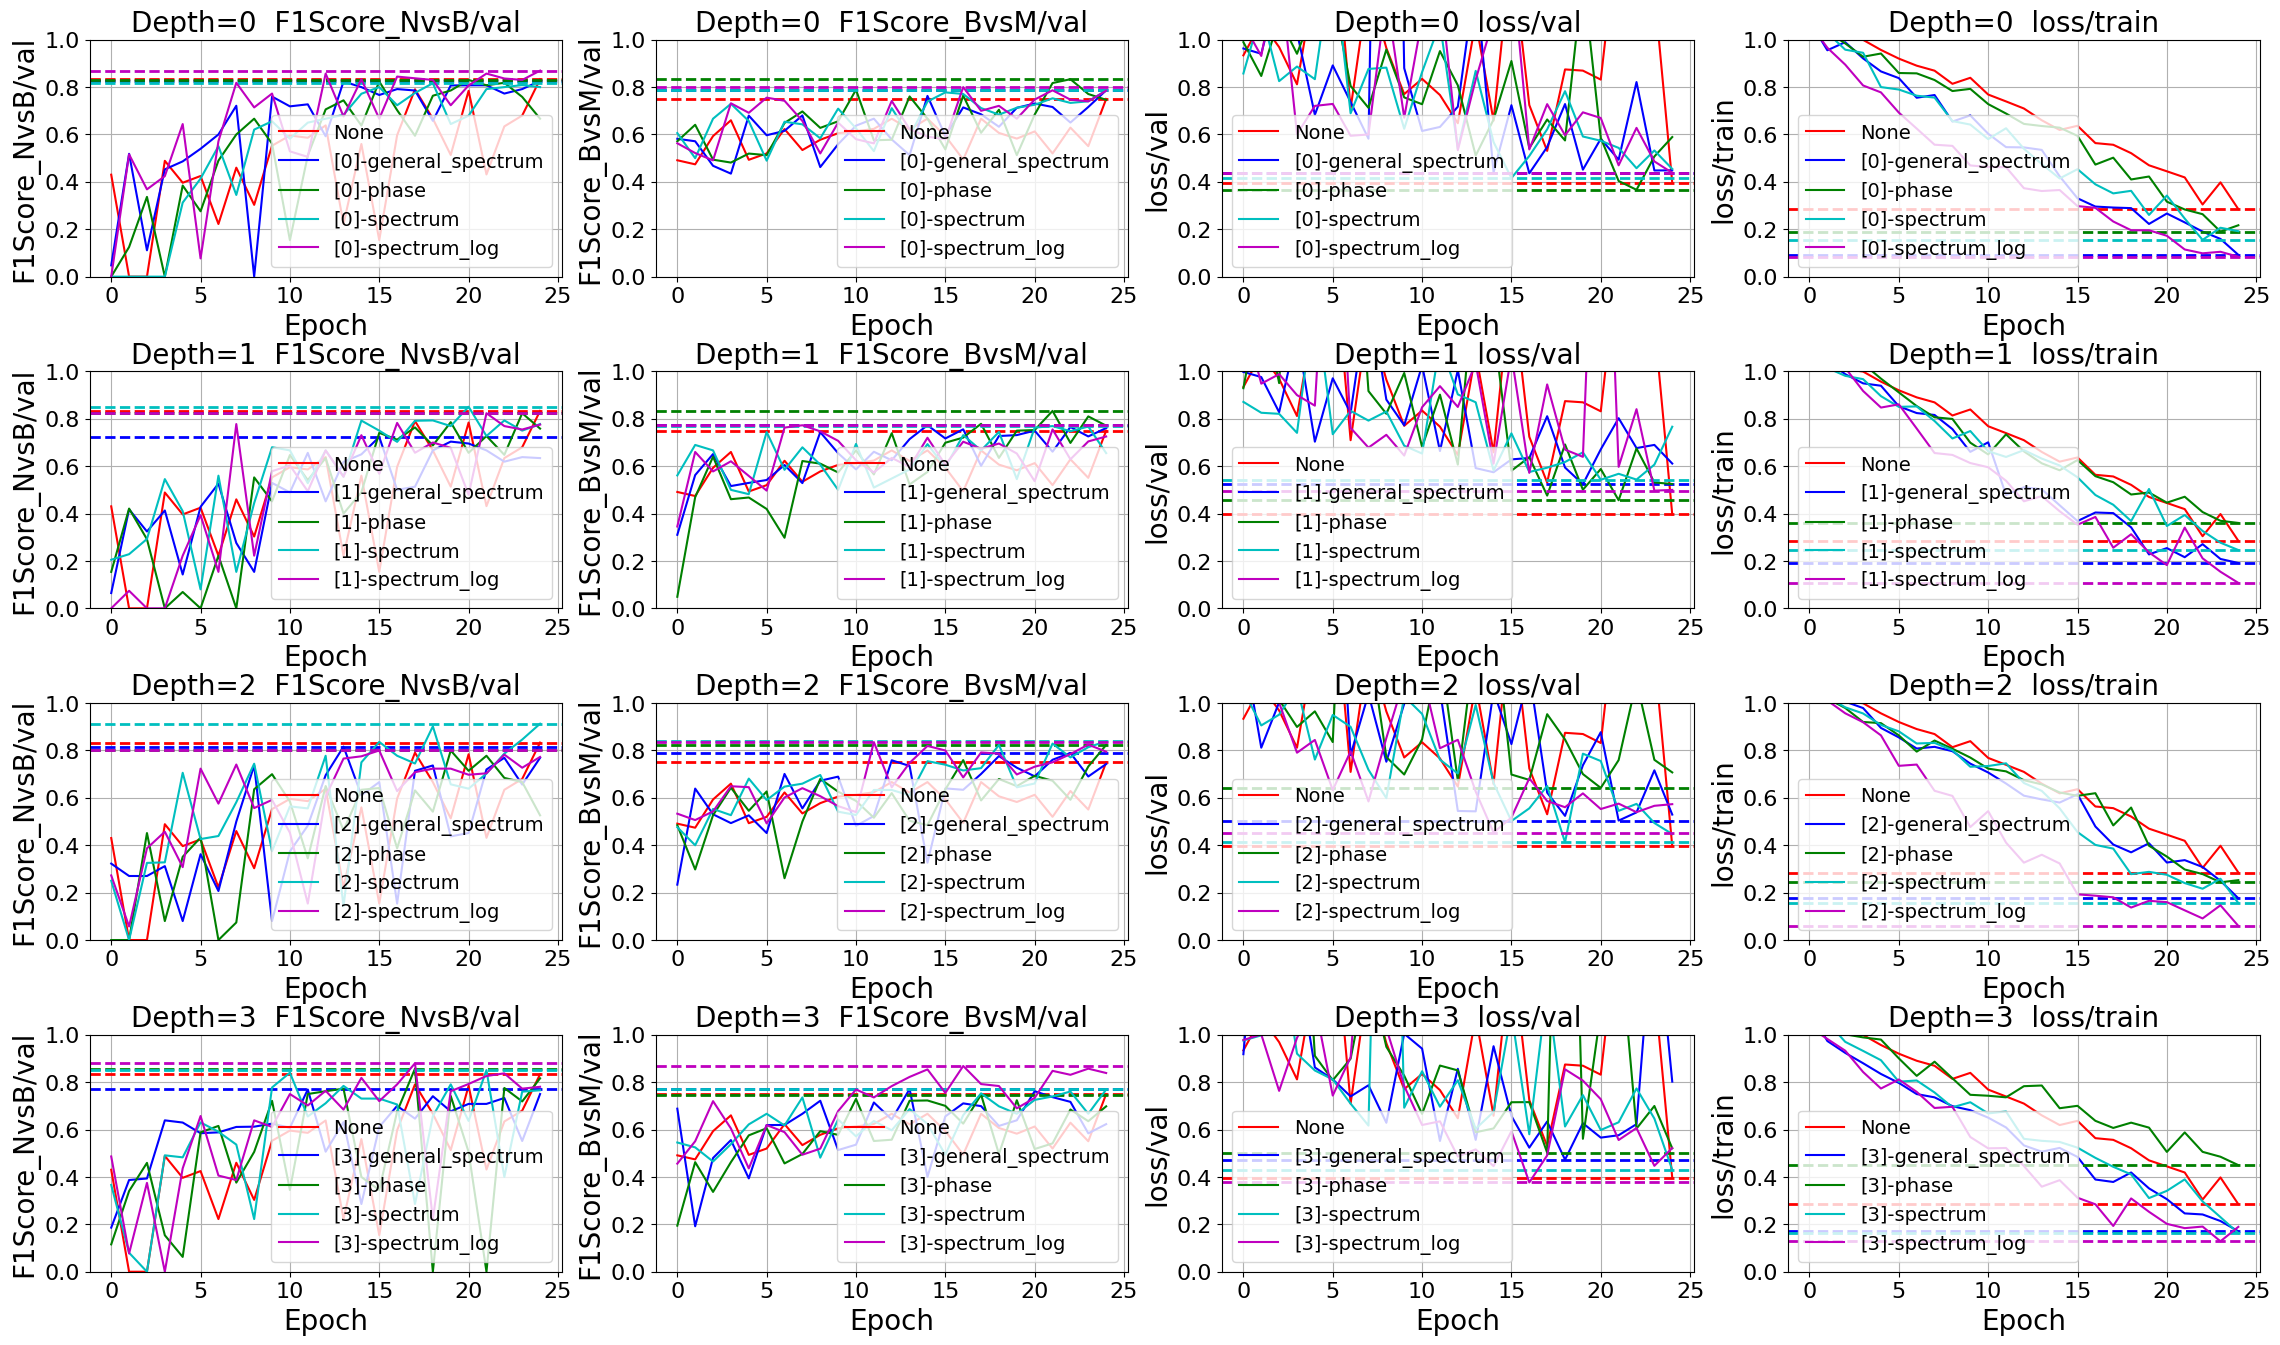

In [24]:
# 4 rows for 4 depths of 1 gafl layer
# 4 columns for 2 metrics on val, loss on val, train
fig, axs2d = plt.subplots(4, 4, figsize=(28,4*4), )

depths_solo = [0,1,2,3]
for row_subplot_i, depth_ in enumerate(depths_solo):
    axs = axs2d[row_subplot_i]
#     axs.set_title('Title', pad=20)
    
    colors = ['r', 'b', 'g', 'c', 'm']

#     axs.suptitle(f'Depth={depth_} GAFL vs None', fontsize=SUBFONTSIZE)
    
    # models_names_to_plot
    mntp = {}
    mntp["no-init"] = [
        'ResNet',
        f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
        f'ResNet_adaptive_[[{depth_}], []]_phase',
        f'ResNet_adaptive_[[{depth_}], []]_spectrum',
        f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
    ]



    labels = ['None',]
    # 1st one is just ResNet
    MNTP_ = mntp["no-init"]
    # get rest of the labels in the format multi_gafl-filter_type
    labels_rest  = [ 
        mntp_.split('_')[2][1:-5] + '-' \
      + mntp_.split(']')[-1][1:] \
        for mntp_ in MNTP_[1:]
    ]
    labels += labels_rest

    cols_plot = ['F1Score_NvsB/val', 'F1Score_BvsM/val', 'loss/val', 'loss/train']
    cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

    for ax_i, cols_plot_i_ in enumerate(cols_plot):
        for i, model_name_ in enumerate(MNTP_):
            axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)
            if ax_i < 2:
                axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
            else:
                axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

        axs[ax_i].set_ylabel(cols_plot[ax_i], fontsize=SUBFONTSIZE)
        axs[ax_i].set_title(cols_plot_names[ax_i], fontsize=SUBFONTSIZE)
        if Y_LIMS_1[ax_i] is not None:
            axs[ax_i].set_ylim(Y_LIMS_1[ax_i])

    for ax in axs:
        ax.grid()
        ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
        ax.legend(fontsize=FONTSIZE_LEGEND)
        ax.tick_params(labelsize=SUBFONTSIZE//1.2)

# plt.tight_layout()
# fig.suptitle('MAIN TITLE', fontsize=24)
plt.subplots_adjust(hspace = 0.4)
plt.show();

### 2 rows for loss and metrics separetely


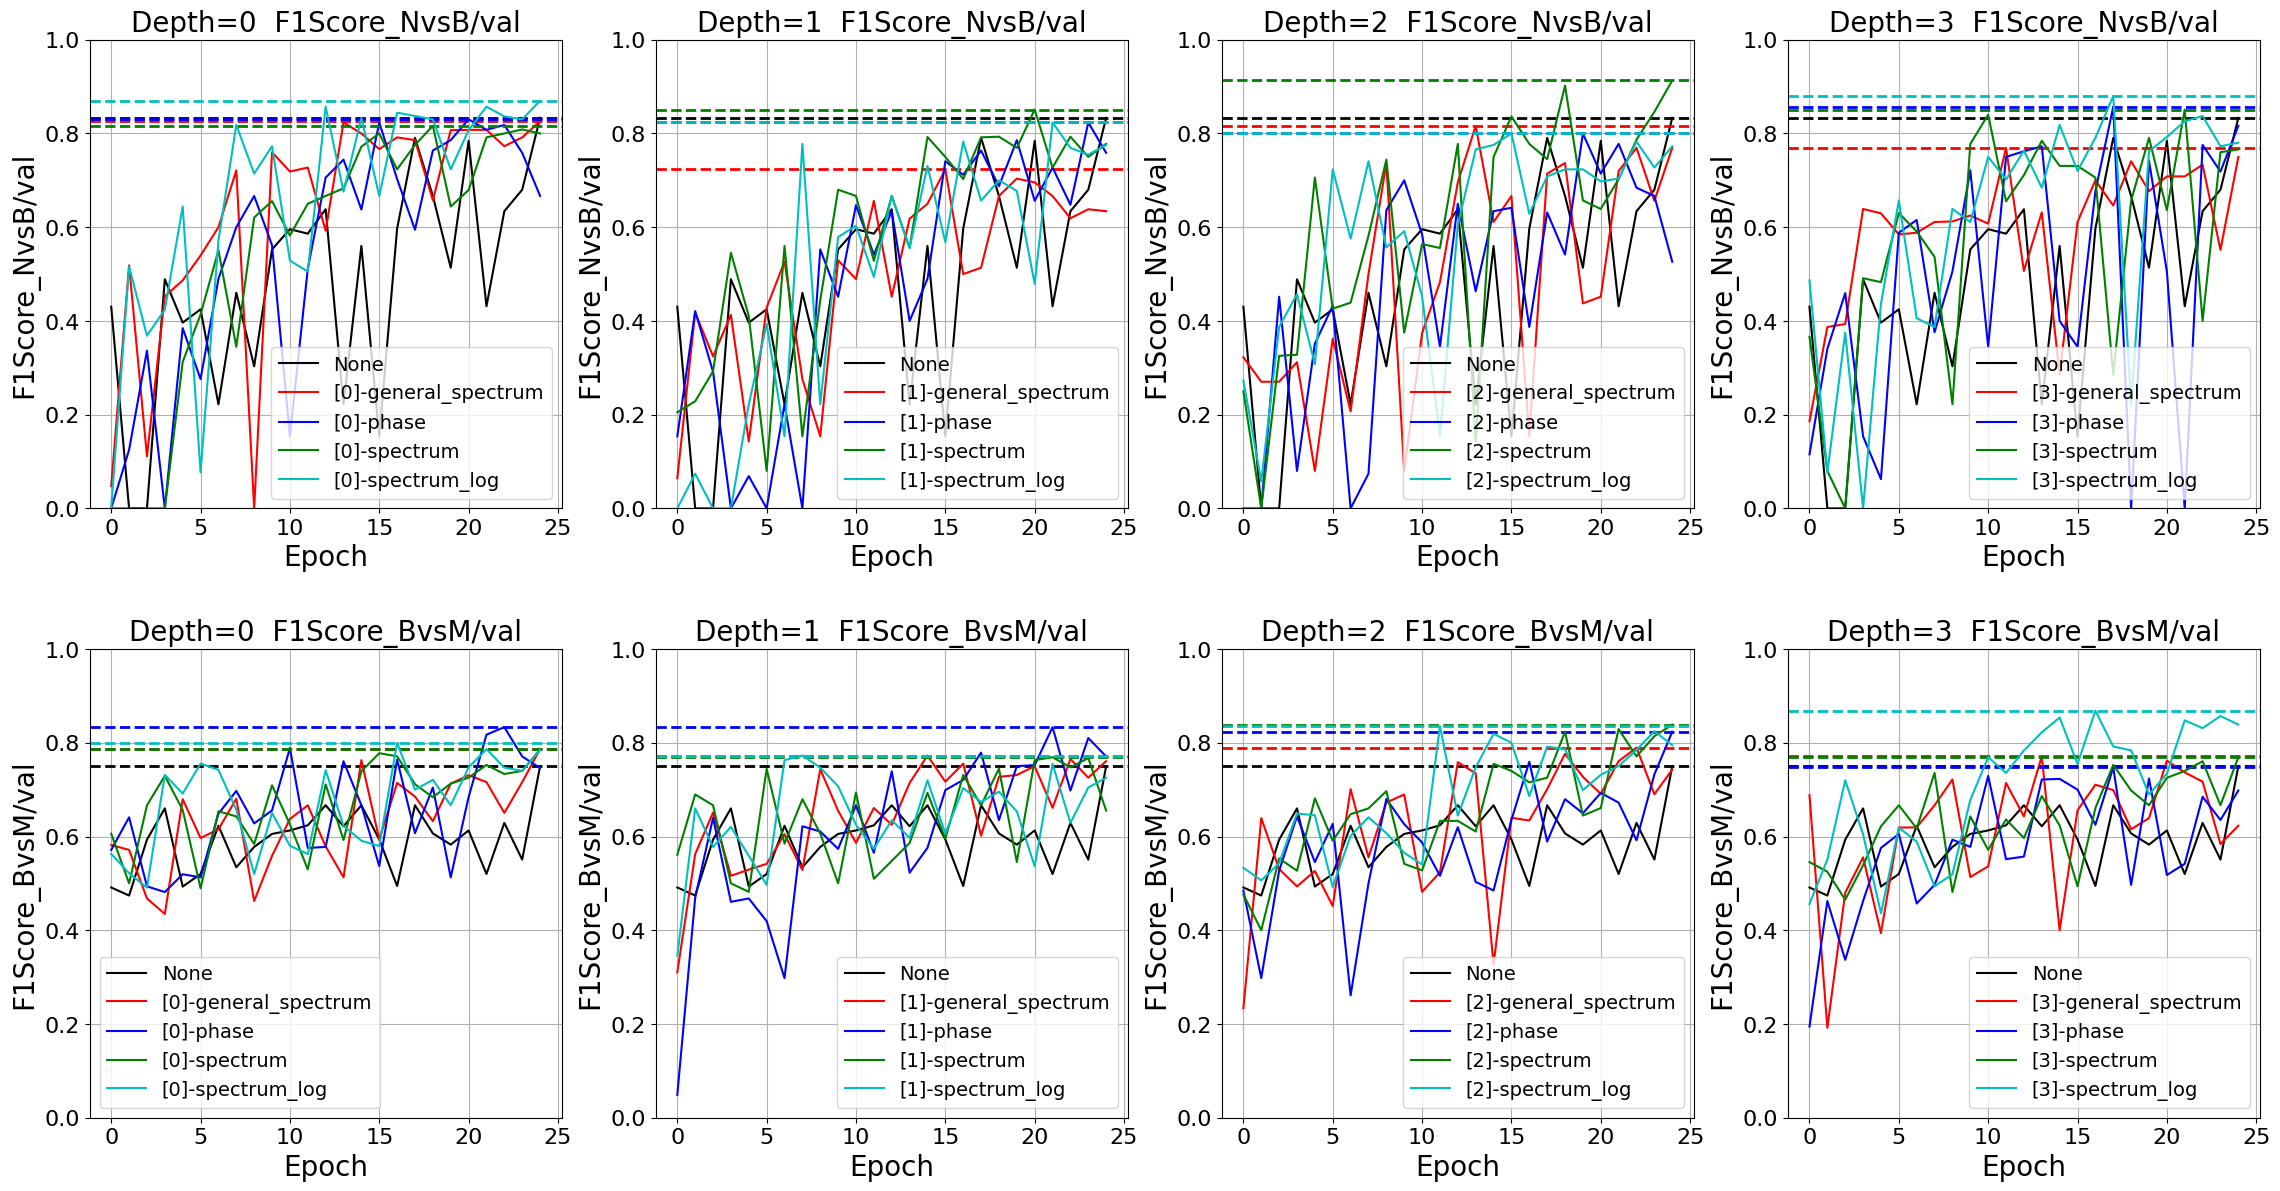

In [25]:
# 4 rows for 4 depths of 1 gafl layer
# 4 columns for 2 metrics on val, loss on val, train
fig, axs2d = plt.subplots(2, 4, figsize=(28,7*2), )
colors = ['black','r', 'b', 'g', 'c', 'm']


depths_solo = [0,1,2,3]
for row_subplot_i, depth_ in enumerate(depths_solo):
    axs = axs2d[0][row_subplot_i] , axs2d[1][row_subplot_i] 
#     axs.set_title('Title', pad=20)
    

#     axs.suptitle(f'Depth={depth_} GAFL vs None', fontsize=SUBFONTSIZE)
    
    # models_names_to_plot
    mntp = {}
    mntp["no-init"] = [
        'ResNet',
        f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
        f'ResNet_adaptive_[[{depth_}], []]_phase',
        f'ResNet_adaptive_[[{depth_}], []]_spectrum',
        f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
    ]



    labels = ['None',]
    # 1st one is just ResNet
    MNTP_ = mntp["no-init"]
    # get rest of the labels in the format multi_gafl-filter_type
    labels_rest  = [ 
        mntp_.split('_')[2][1:-5] + '-' \
      + mntp_.split(']')[-1][1:] \
        for mntp_ in MNTP_[1:]
    ]
    labels += labels_rest

    cols_plot = ['F1Score_NvsB/val', 'F1Score_BvsM/val',]
    cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

    for ax_i, cols_plot_i_ in enumerate(cols_plot):
        for i, model_name_ in enumerate(MNTP_):
            axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)
            
            if cols_plot_i_.split('//')[0][:4] == 'loss':
                axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
            else:
                axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

        axs[ax_i].set_ylabel(cols_plot[ax_i], fontsize=SUBFONTSIZE)
        axs[ax_i].set_title(cols_plot_names[ax_i], fontsize=SUBFONTSIZE)
        if Y_LIMS_1_SCORES[ax_i] is not None:
            axs[ax_i].set_ylim(Y_LIMS_1_SCORES[ax_i])

    for ax in axs:
        ax.grid()
        ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
        ax.legend(fontsize=FONTSIZE_LEGEND)
        ax.tick_params(labelsize=SUBFONTSIZE//1.2)

# plt.tight_layout()
# fig.suptitle('MAIN TITLE', fontsize=24)
plt.subplots_adjust(hspace = 0.3)
plt.show();

### Same for losses

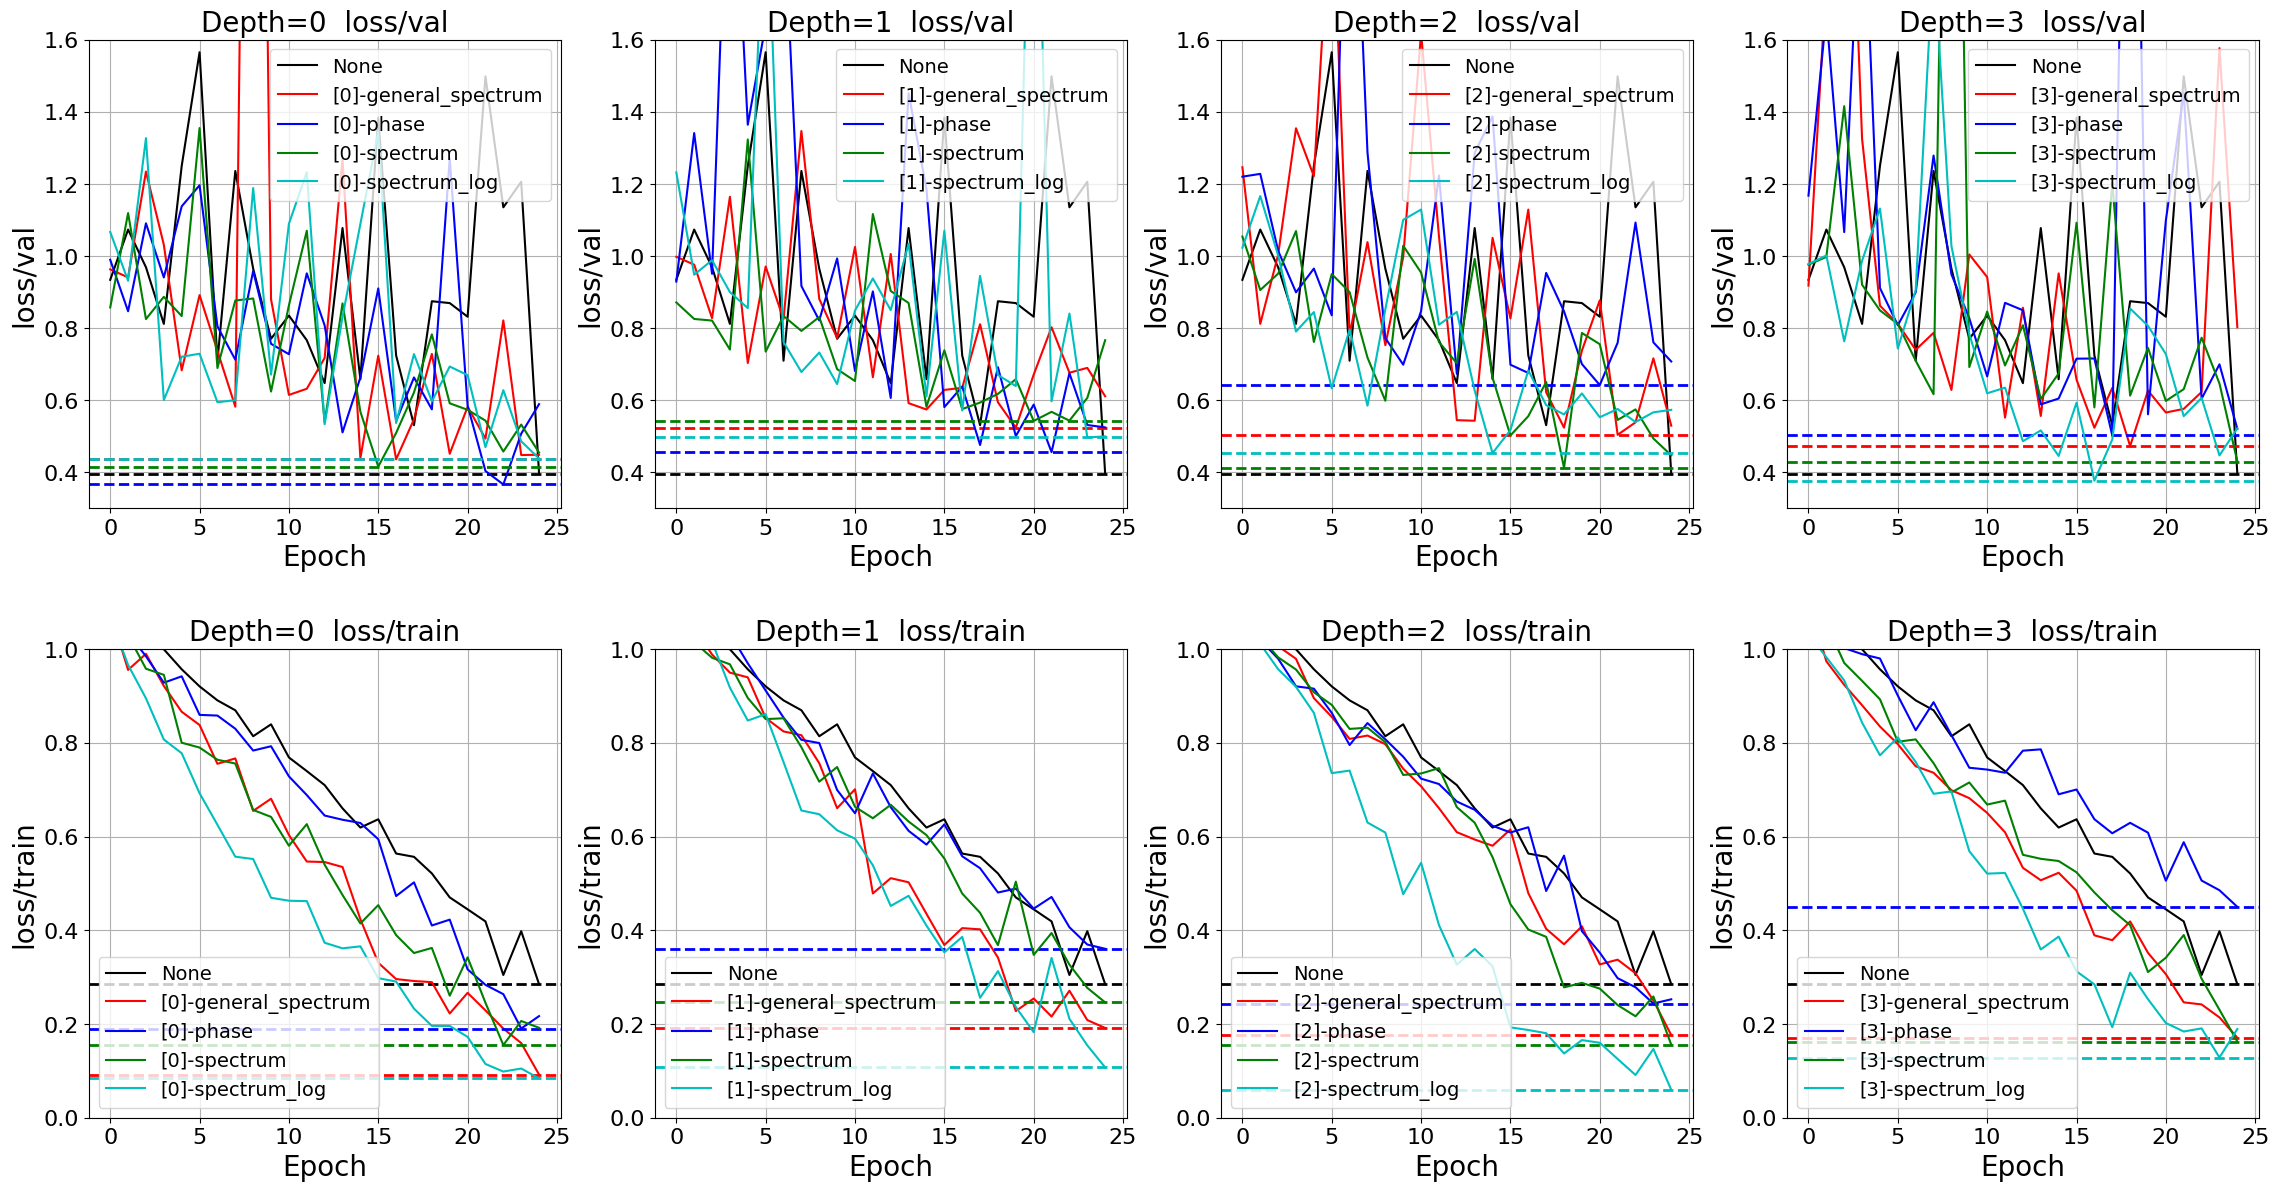

In [26]:
# 4 rows for 4 depths of 1 gafl layer
# 4 columns for 2 metrics on val, loss on val, train
fig, axs2d = plt.subplots(2, 4, figsize=(28,7*2), )
colors = ['black','r', 'b', 'g', 'c', 'm']

depths_solo = [0,1,2,3]
for row_subplot_i, depth_ in enumerate(depths_solo):
    axs = axs2d[0][row_subplot_i] , axs2d[1][row_subplot_i] 
#     axs.set_title('Title', pad=20)
    

#     axs.suptitle(f'Depth={depth_} GAFL vs None', fontsize=SUBFONTSIZE)
    
    # models_names_to_plot
    mntp = {}
    mntp["no-init"] = [
        'ResNet',
        f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
        f'ResNet_adaptive_[[{depth_}], []]_phase',
        f'ResNet_adaptive_[[{depth_}], []]_spectrum',
        f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
    ]



    labels = ['None',]
    # 1st one is just ResNet
    MNTP_ = mntp["no-init"]
    # get rest of the labels in the format multi_gafl-filter_type
    labels_rest  = [ 
        mntp_.split('_')[2][1:-5] + '-' \
      + mntp_.split(']')[-1][1:] \
        for mntp_ in MNTP_[1:]
    ]
    labels += labels_rest

    cols_plot = ['loss/val', 'loss/train']
    cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

    for ax_i, cols_plot_i_ in enumerate(cols_plot):
        for i, model_name_ in enumerate(MNTP_):
            axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)
            
            if cols_plot_i_.split('//')[0][:4] == 'loss':
                axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
            else:
                axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

        axs[ax_i].set_ylabel(cols_plot[ax_i], fontsize=SUBFONTSIZE)
        axs[ax_i].set_title(cols_plot_names[ax_i], fontsize=SUBFONTSIZE)
        if Y_LIMS_1_LOSS[ax_i] is not None:
            axs[ax_i].set_ylim(Y_LIMS_1_LOSS[ax_i])

    for ax in axs:
        ax.grid()
        ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
        ax.legend(fontsize=FONTSIZE_LEGEND)
        ax.tick_params(labelsize=SUBFONTSIZE//1.2)

# plt.tight_layout()
# fig.suptitle('MAIN TITLE', fontsize=24)
plt.subplots_adjust(hspace = 0.3)
plt.show();

attempt to make it right

In [27]:
# # 4 rows for 4 depths of 1 gafl layer
# # 4 columns for 2 metrics on val, loss on val, train
# fig, axs2d = plt.subplots(2, 4, figsize=(28,7*2), )

# depths_solo = [0,1,2,3]
# for row_subplot_i, depth_ in enumerate(depths_solo):
#     axs = axs2d[row_subplot_i]
# #     axs.set_title('Title', pad=20)
    
#     colors = ['r', 'b', 'g', 'c', 'm']

# #     axs.suptitle(f'Depth={depth_} GAFL vs None', fontsize=SUBFONTSIZE)
    
#     # models_names_to_plot
#     mntp = {}
#     mntp["no-init"] = [
#         'ResNet',
#         f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
#         f'ResNet_adaptive_[[{depth_}], []]_phase',
#         f'ResNet_adaptive_[[{depth_}], []]_spectrum',
#         f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
#     ]



#     labels = ['None',]
#     # 1st one is just ResNet
#     MNTP_ = mntp["no-init"]
#     # get rest of the labels in the format multi_gafl-filter_type
#     labels_rest  = [ 
#         mntp_.split('_')[2][1:-5] + '-' \
#       + mntp_.split(']')[-1][1:] \
#         for mntp_ in MNTP_[1:]
#     ]
#     labels += labels_rest

#     cols_plot = ['loss/val', 'loss/train']
#     cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

    
#     for i, model_name_ in enumerate(MNTP_):
#         for ax_i, cols_plot_i_ in enumerate(cols_plot):
#             axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)
#             if cols_plot_i_.split('//')[0] == 'loss':
#                 axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
#             else:
#                 axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

#         axs[i].set_ylabel(cols_plot[i], fontsize=SUBFONTSIZE)
#         axs[i].set_title(cols_plot_names[i], fontsize=SUBFONTSIZE)
#         if Y_LIMS_1_LOSS[i] is not None:
#             axs[i].set_ylim(Y_LIMS_1_LOSS[i])

#     for ax in axs:
#         ax.grid()
#         ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
#         ax.legend(fontsize=FONTSIZE_LEGEND)
#         ax.tick_params(labelsize=SUBFONTSIZE//1.2)

# # plt.tight_layout()
# # fig.suptitle('MAIN TITLE', fontsize=24)
# plt.subplots_adjust(hspace = 0.4)
# plt.show();

## (2) 2 GAFLs on every position vs None

In [28]:
FONTSIZE_LEGEND = 14
SUBFONTSIZE = 20
Y_LIMS_1 = [(0, 1), (0, 1), (0, 1), (0, 1)]

Y_LIMS_1_SCORES = [(0, 1), (0.25, 1)]
Y_LIMS_1_LOSS = [(0.3, 1.6), (0, 1)]

In [29]:
# from itertools import combinations
# combinations_2gafls = list(combinations(range(4), 2))
# combinations_2gafls = [ str(val)[1:-1] for val in combinations_2gafls]
# combinations_2gafls

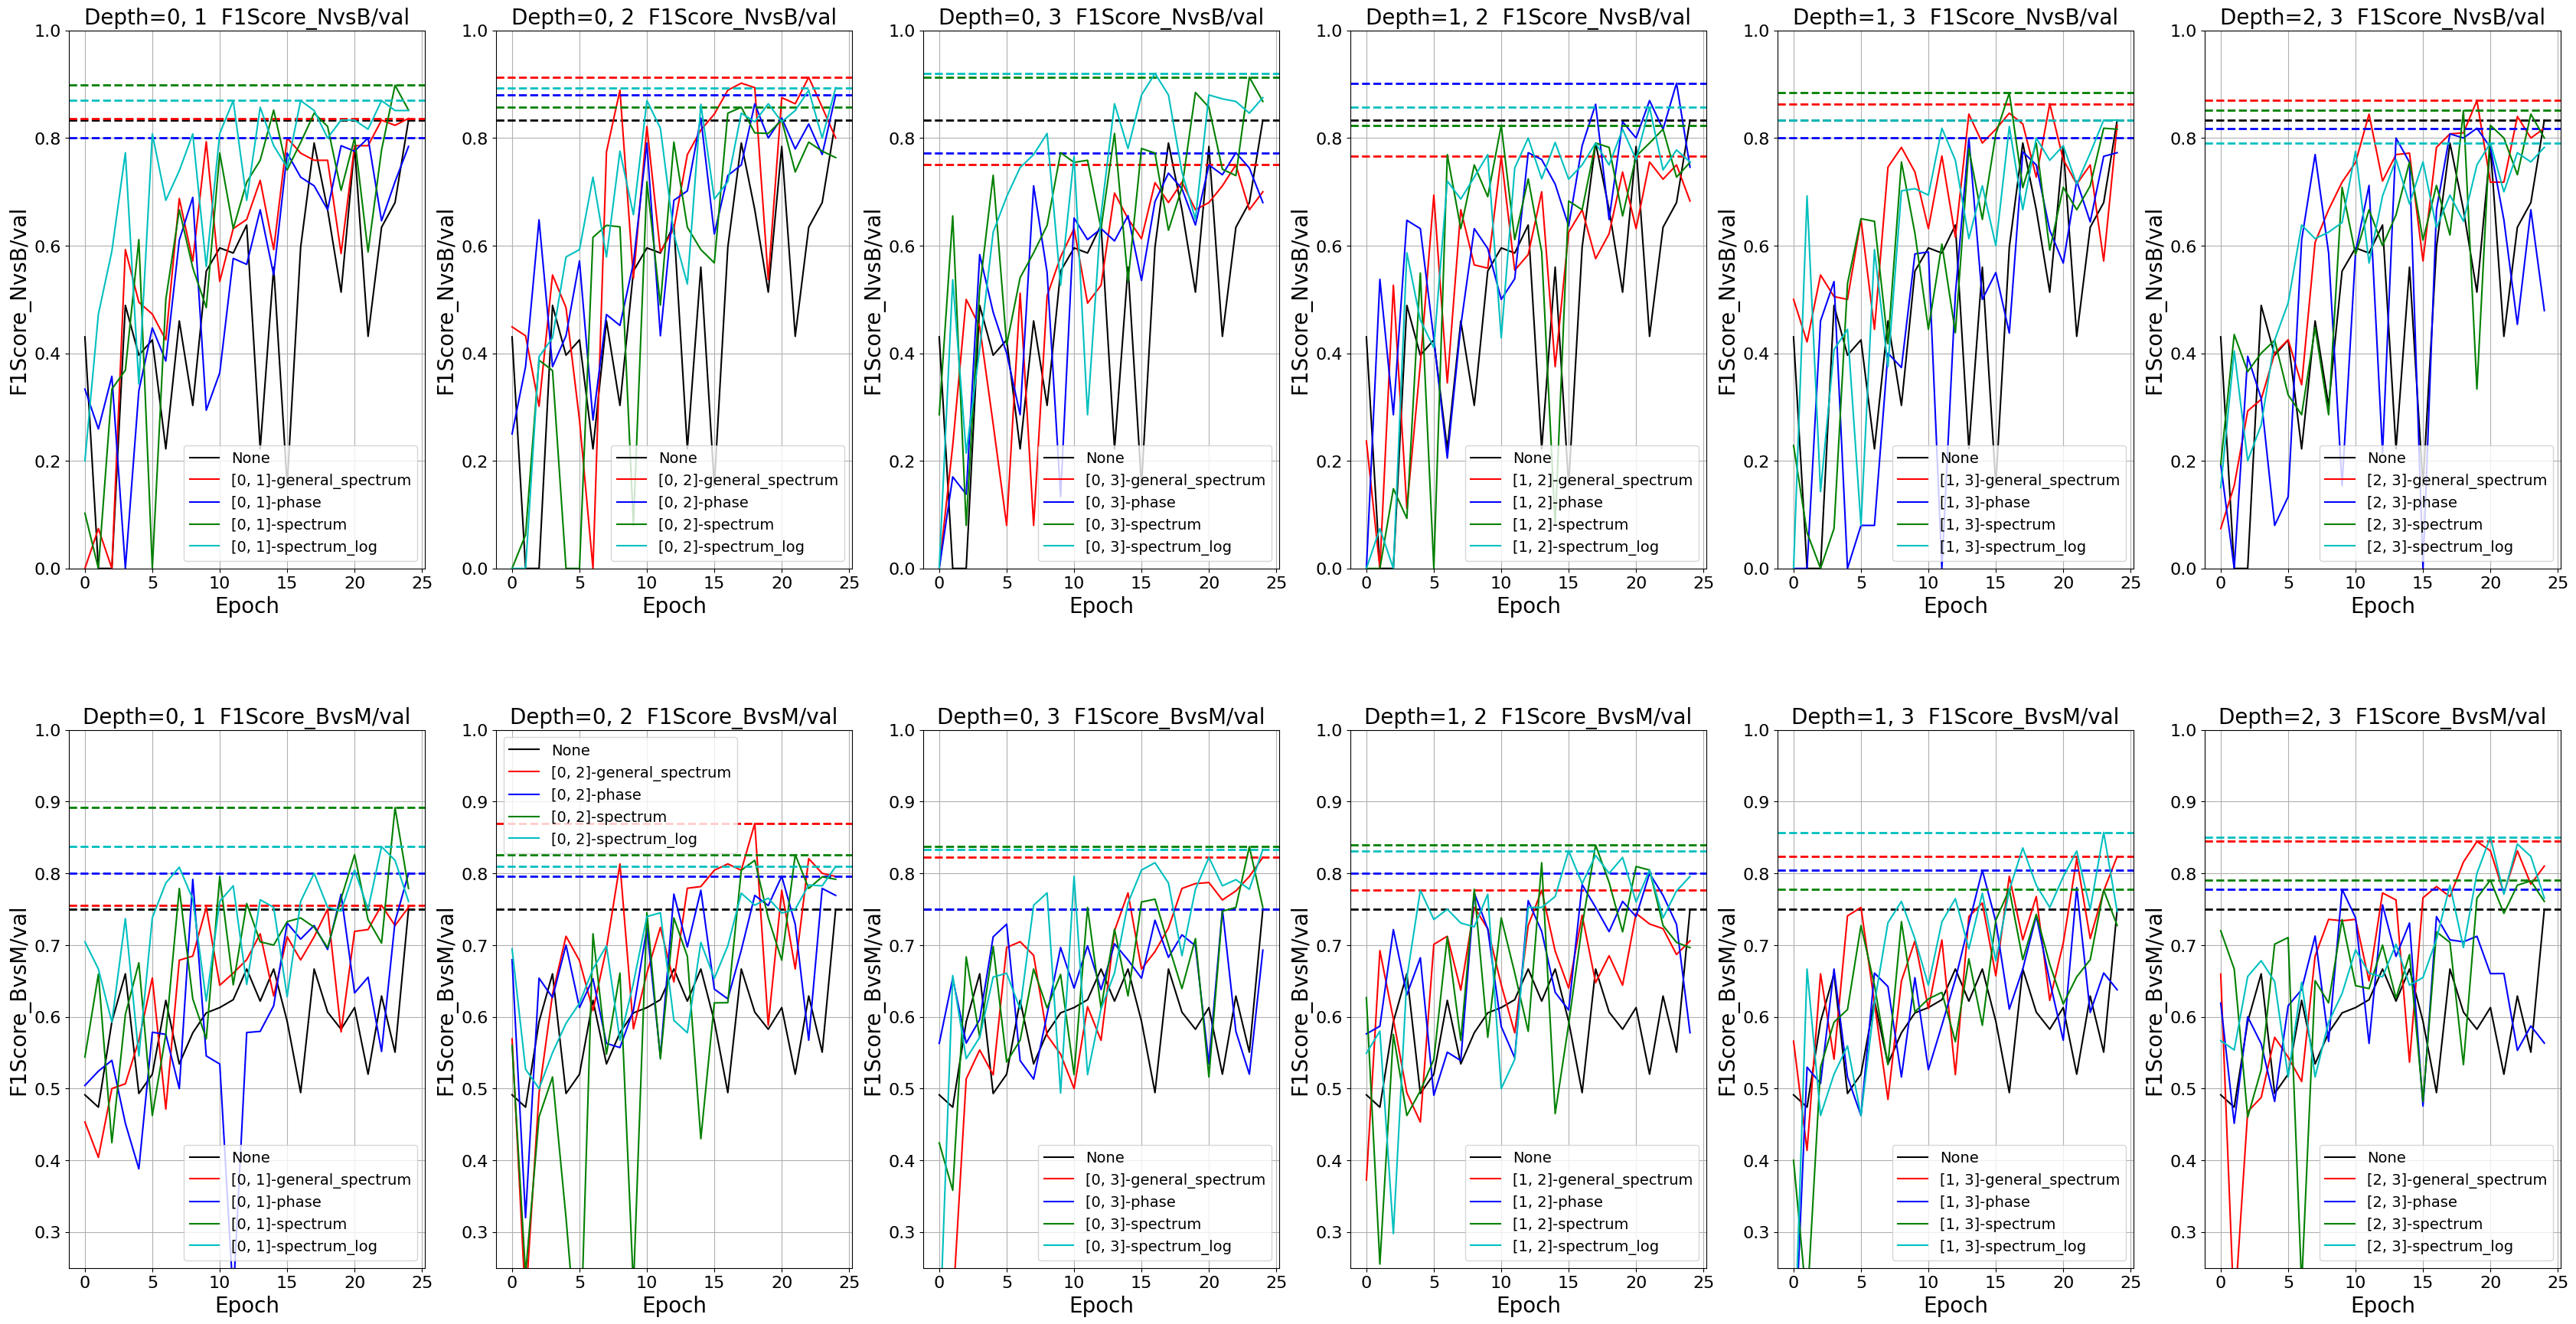

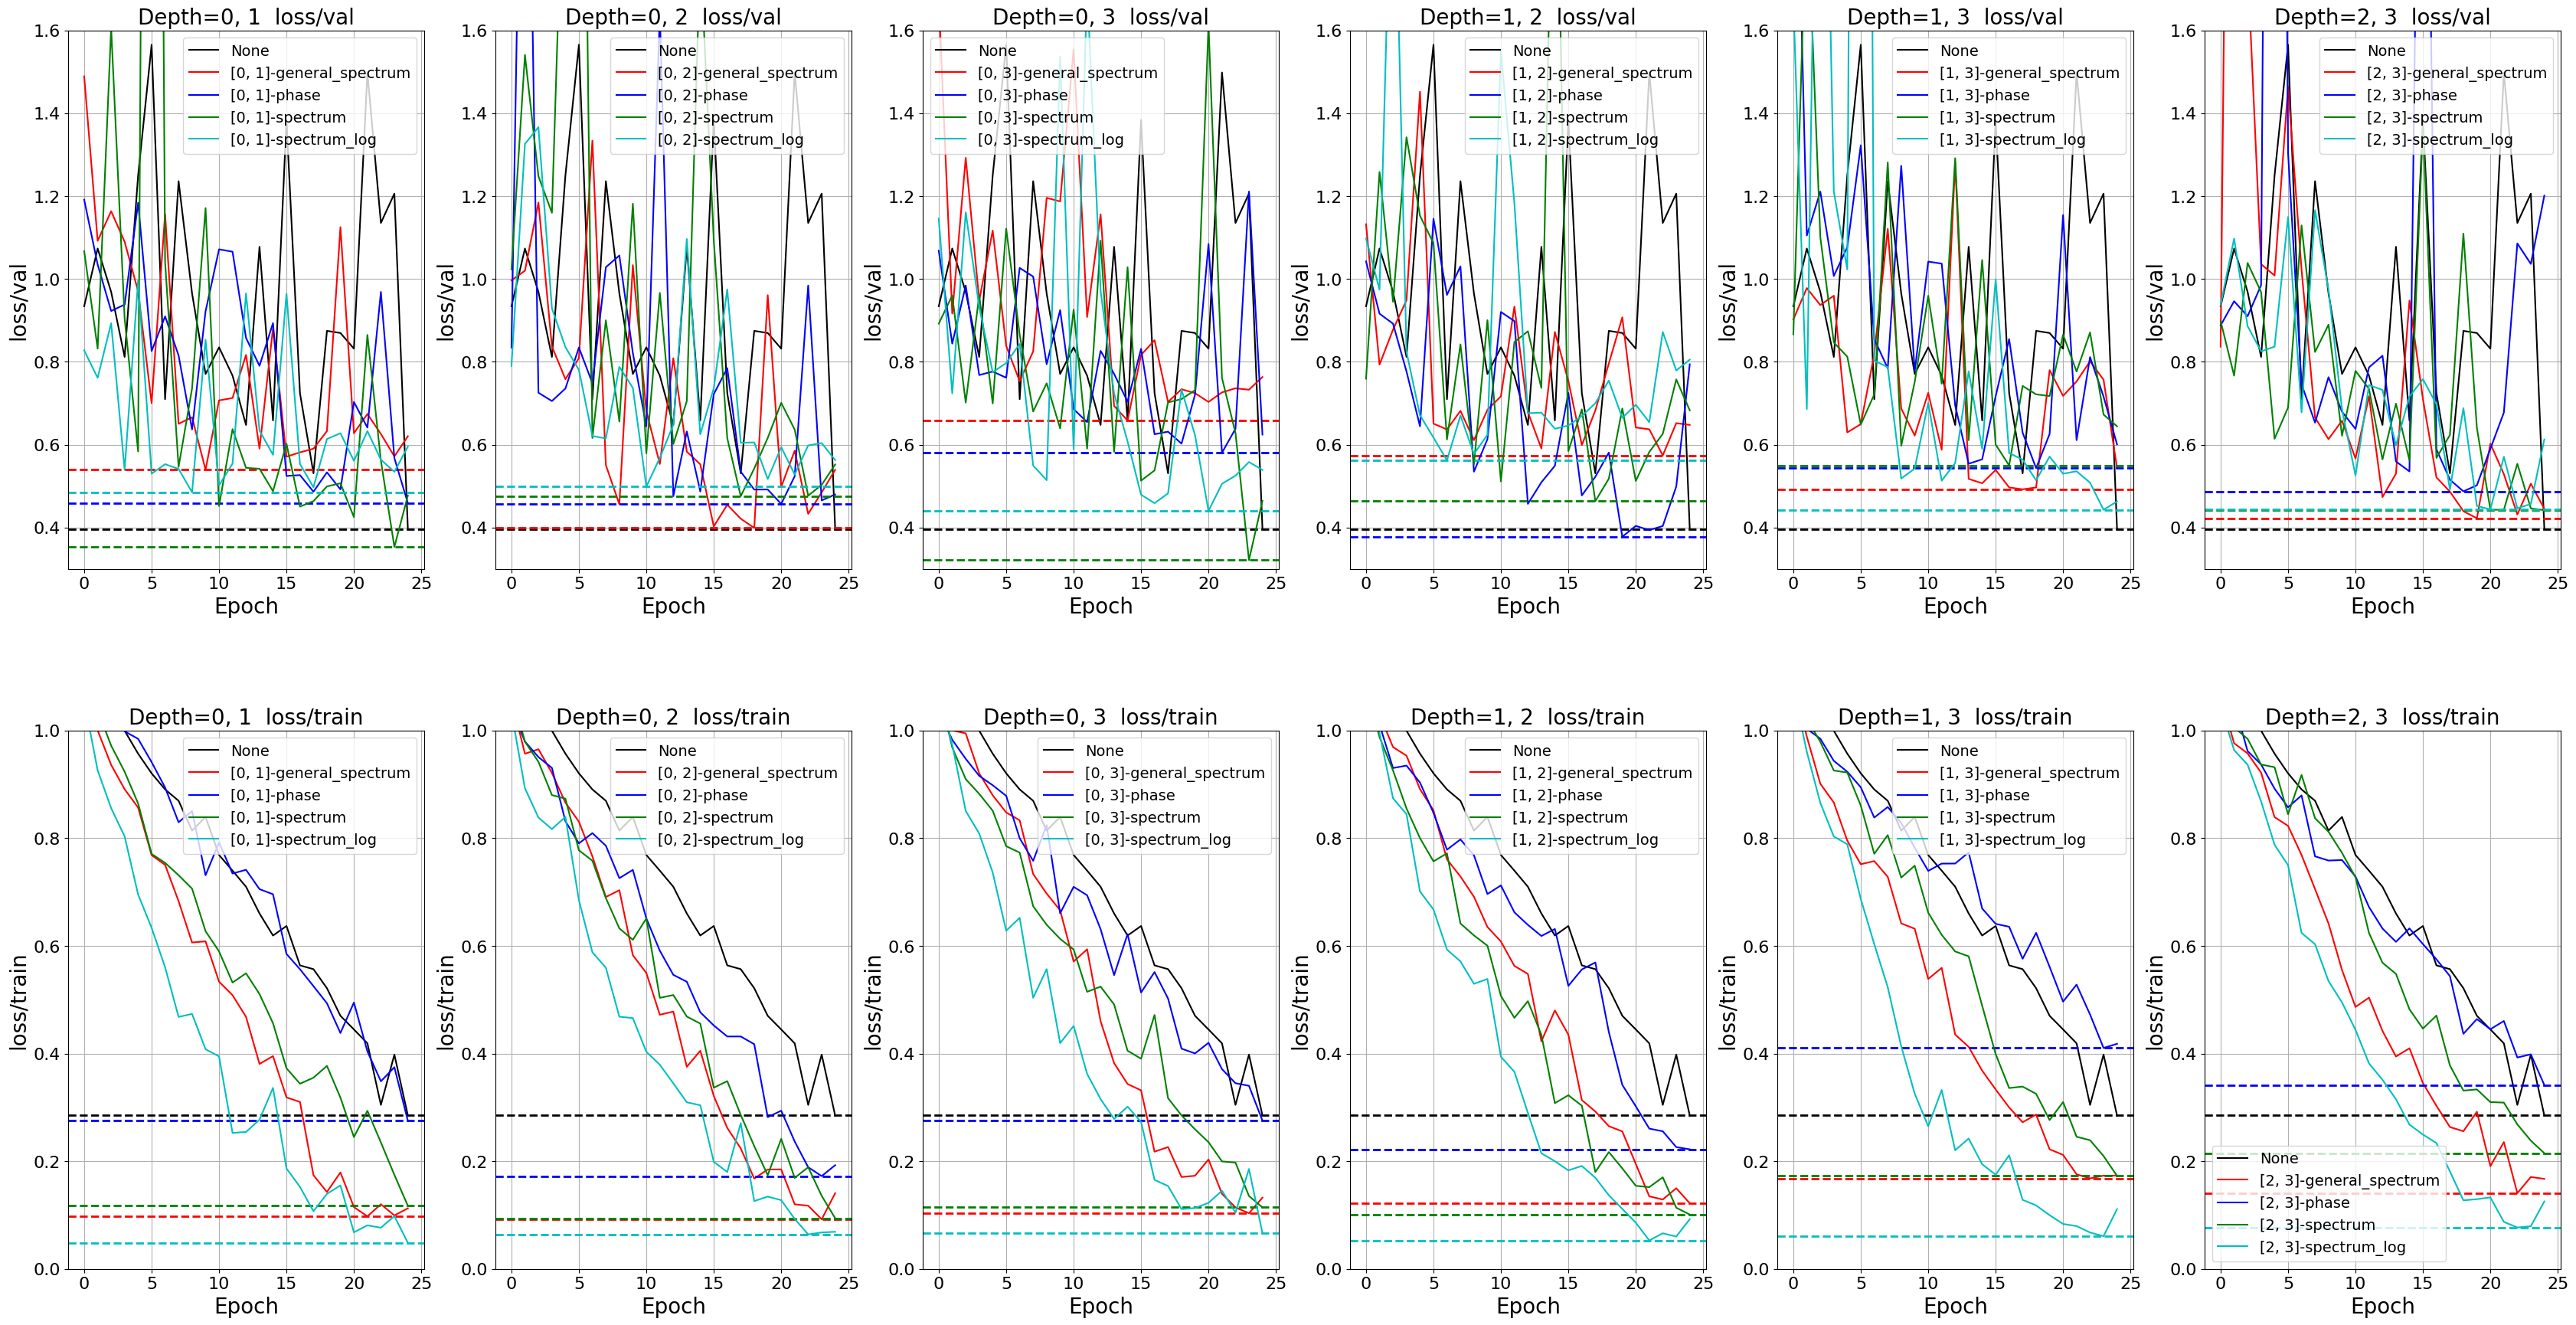

In [30]:
cols_plot_2_plots = (['F1Score_NvsB/val', 'F1Score_BvsM/val'], ['loss/val', 'loss/train'])


for f1_or_loss, cols_plot in enumerate(cols_plot_2_plots):
    # 4 rows for 4 depths of 1 gafl layer
    # 4 columns for 2 metrics on val, loss on val, train
    fig, axs2d = plt.subplots(2, 6, figsize=(28*6//4, 7*2 *6//4), )
    colors = ['black','r', 'b', 'g', 'c', 'm', 'y']

    from itertools import combinations
    combinations_2gafls = list(combinations(range(4), 2))
    combinations_2gafls = [ str(val)[1:-1] for val in combinations_2gafls]

    for row_subplot_i, depth_ in enumerate(combinations_2gafls):
        axs = axs2d[0][row_subplot_i] , axs2d[1][row_subplot_i] 
    #     axs.set_title('Title', pad=20)


    #     axs.suptitle(f'Depth={depth_} GAFL vs None', fontsize=SUBFONTSIZE)

        # models_names_to_plot
        mntp = {}
        mntp["no-init"] = [
            'ResNet',
            f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
            f'ResNet_adaptive_[[{depth_}], []]_phase',
            f'ResNet_adaptive_[[{depth_}], []]_spectrum',
            f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
        ]



        labels = ['None',]
        # 1st one is just ResNet
        MNTP_ = mntp["no-init"]
        # get rest of the labels in the format multi_gafl-filter_type
        labels_rest  = [ 
            mntp_.split('_')[2][1:-5] + '-' \
          + mntp_.split(']')[-1][1:] \
            for mntp_ in MNTP_[1:]
        ]
        labels += labels_rest

        cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

        for ax_i, cols_plot_i_ in enumerate(cols_plot):
            for i, model_name_ in enumerate(MNTP_):
                axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)

                if cols_plot_i_.split('//')[0][:4] == 'loss':
                    axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
                else:
                    axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

            axs[ax_i].set_ylabel(cols_plot[ax_i], fontsize=SUBFONTSIZE)
            axs[ax_i].set_title(cols_plot_names[ax_i], fontsize=SUBFONTSIZE)
            
            Y_LIM_ = ([Y_LIMS_1_SCORES, Y_LIMS_1_LOSS])[f1_or_loss]
            if Y_LIM_[ax_i] is not None:
                axs[ax_i].set_ylim(Y_LIM_[ax_i])

        for ax in axs:
            ax.grid()
            ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
            ax.legend(fontsize=FONTSIZE_LEGEND)
            ax.tick_params(labelsize=SUBFONTSIZE//1.2)

    # plt.tight_layout()
    # fig.suptitle('MAIN TITLE', fontsize=24)
    plt.subplots_adjust(hspace = 0.3)
    plt.show();

## (3) 3 GAFLs on every position vs None

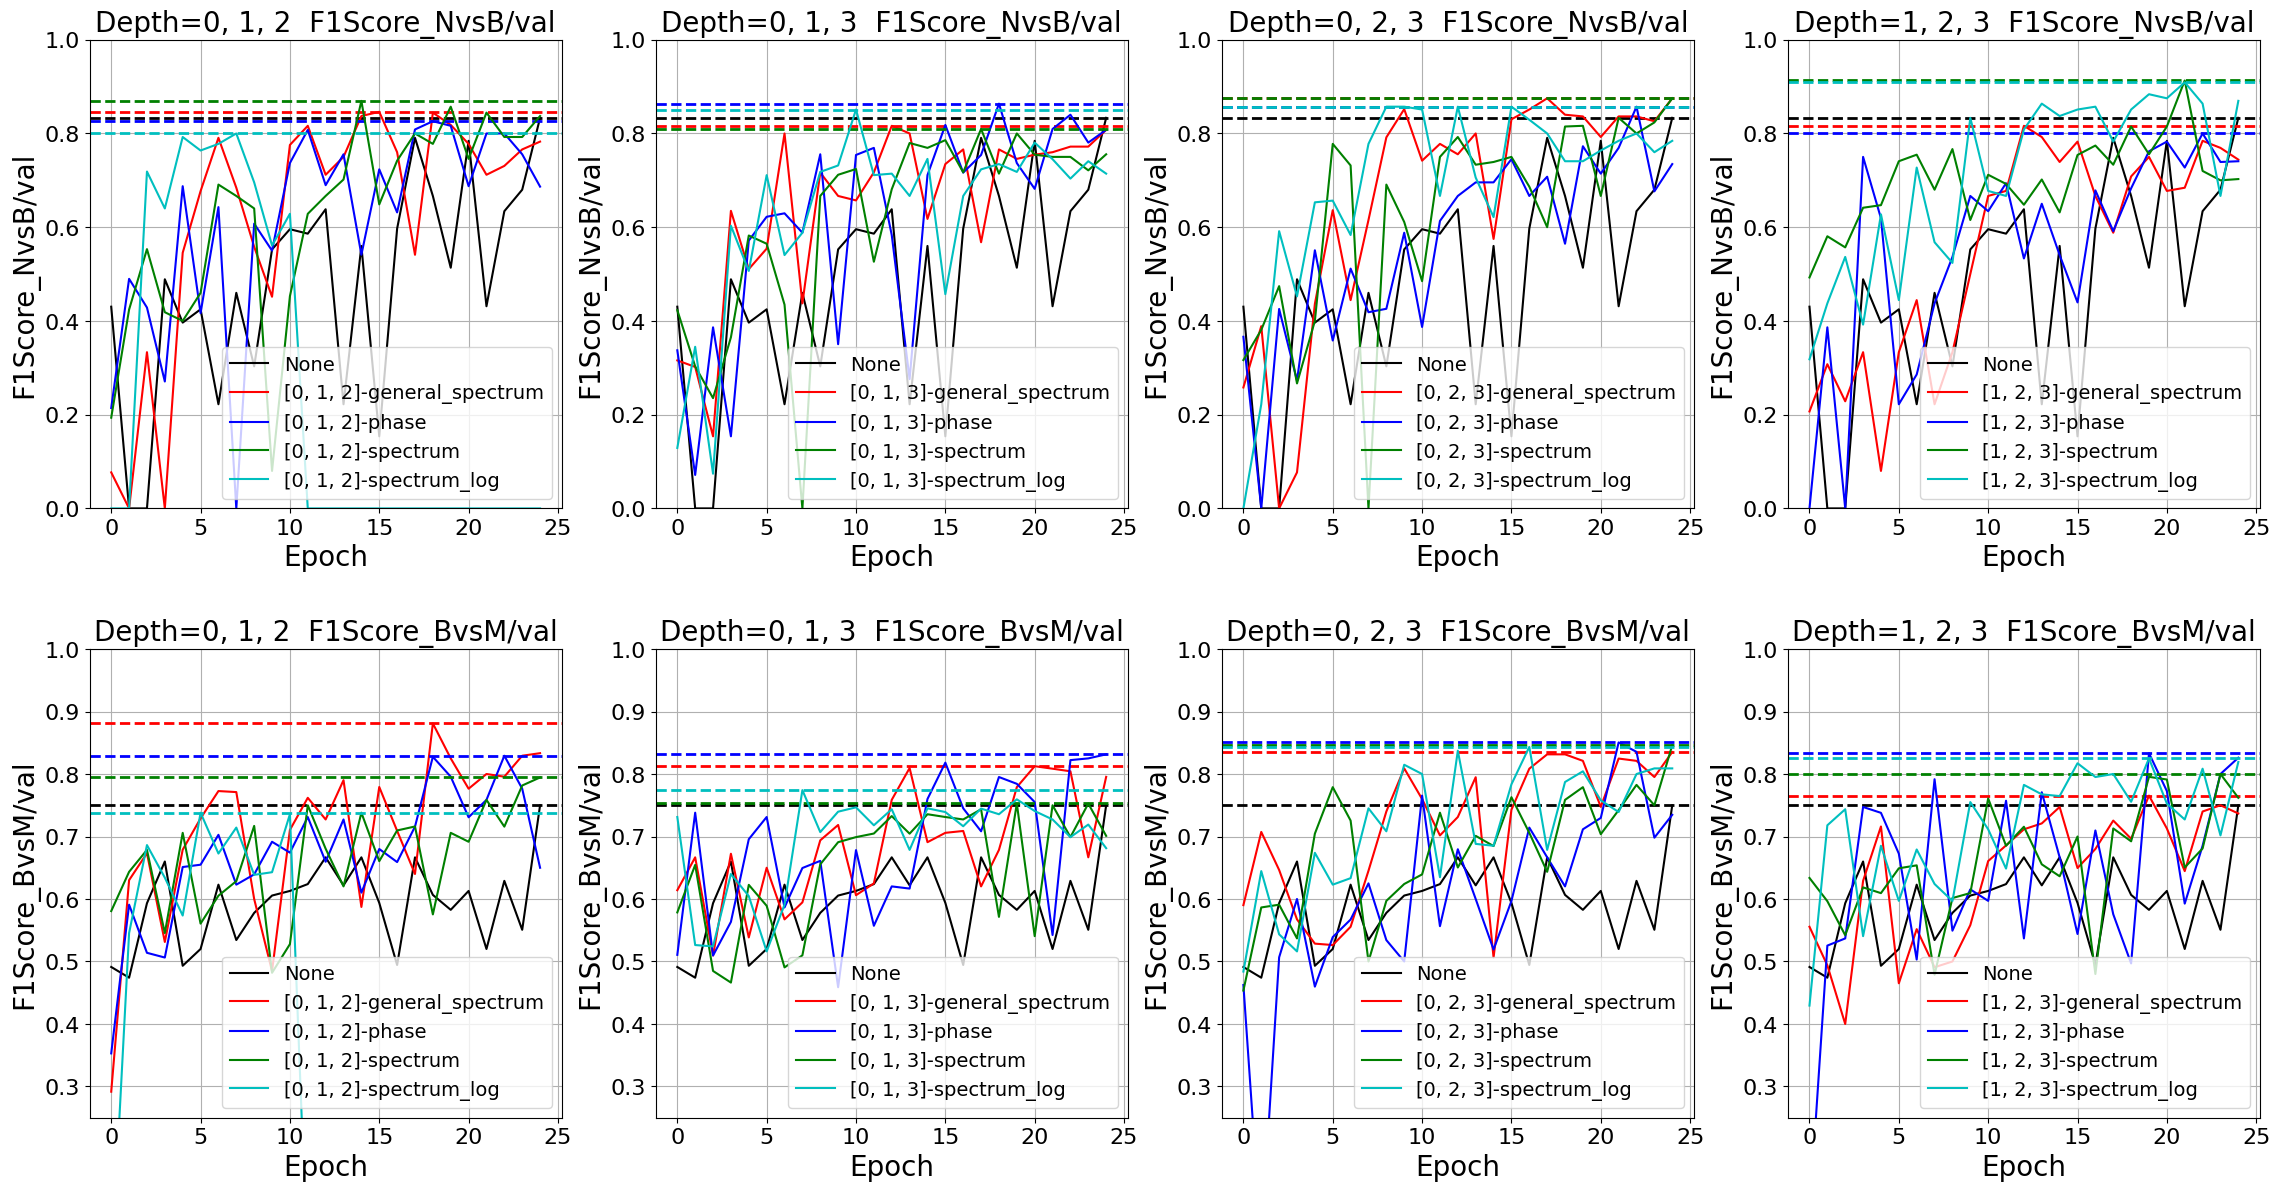

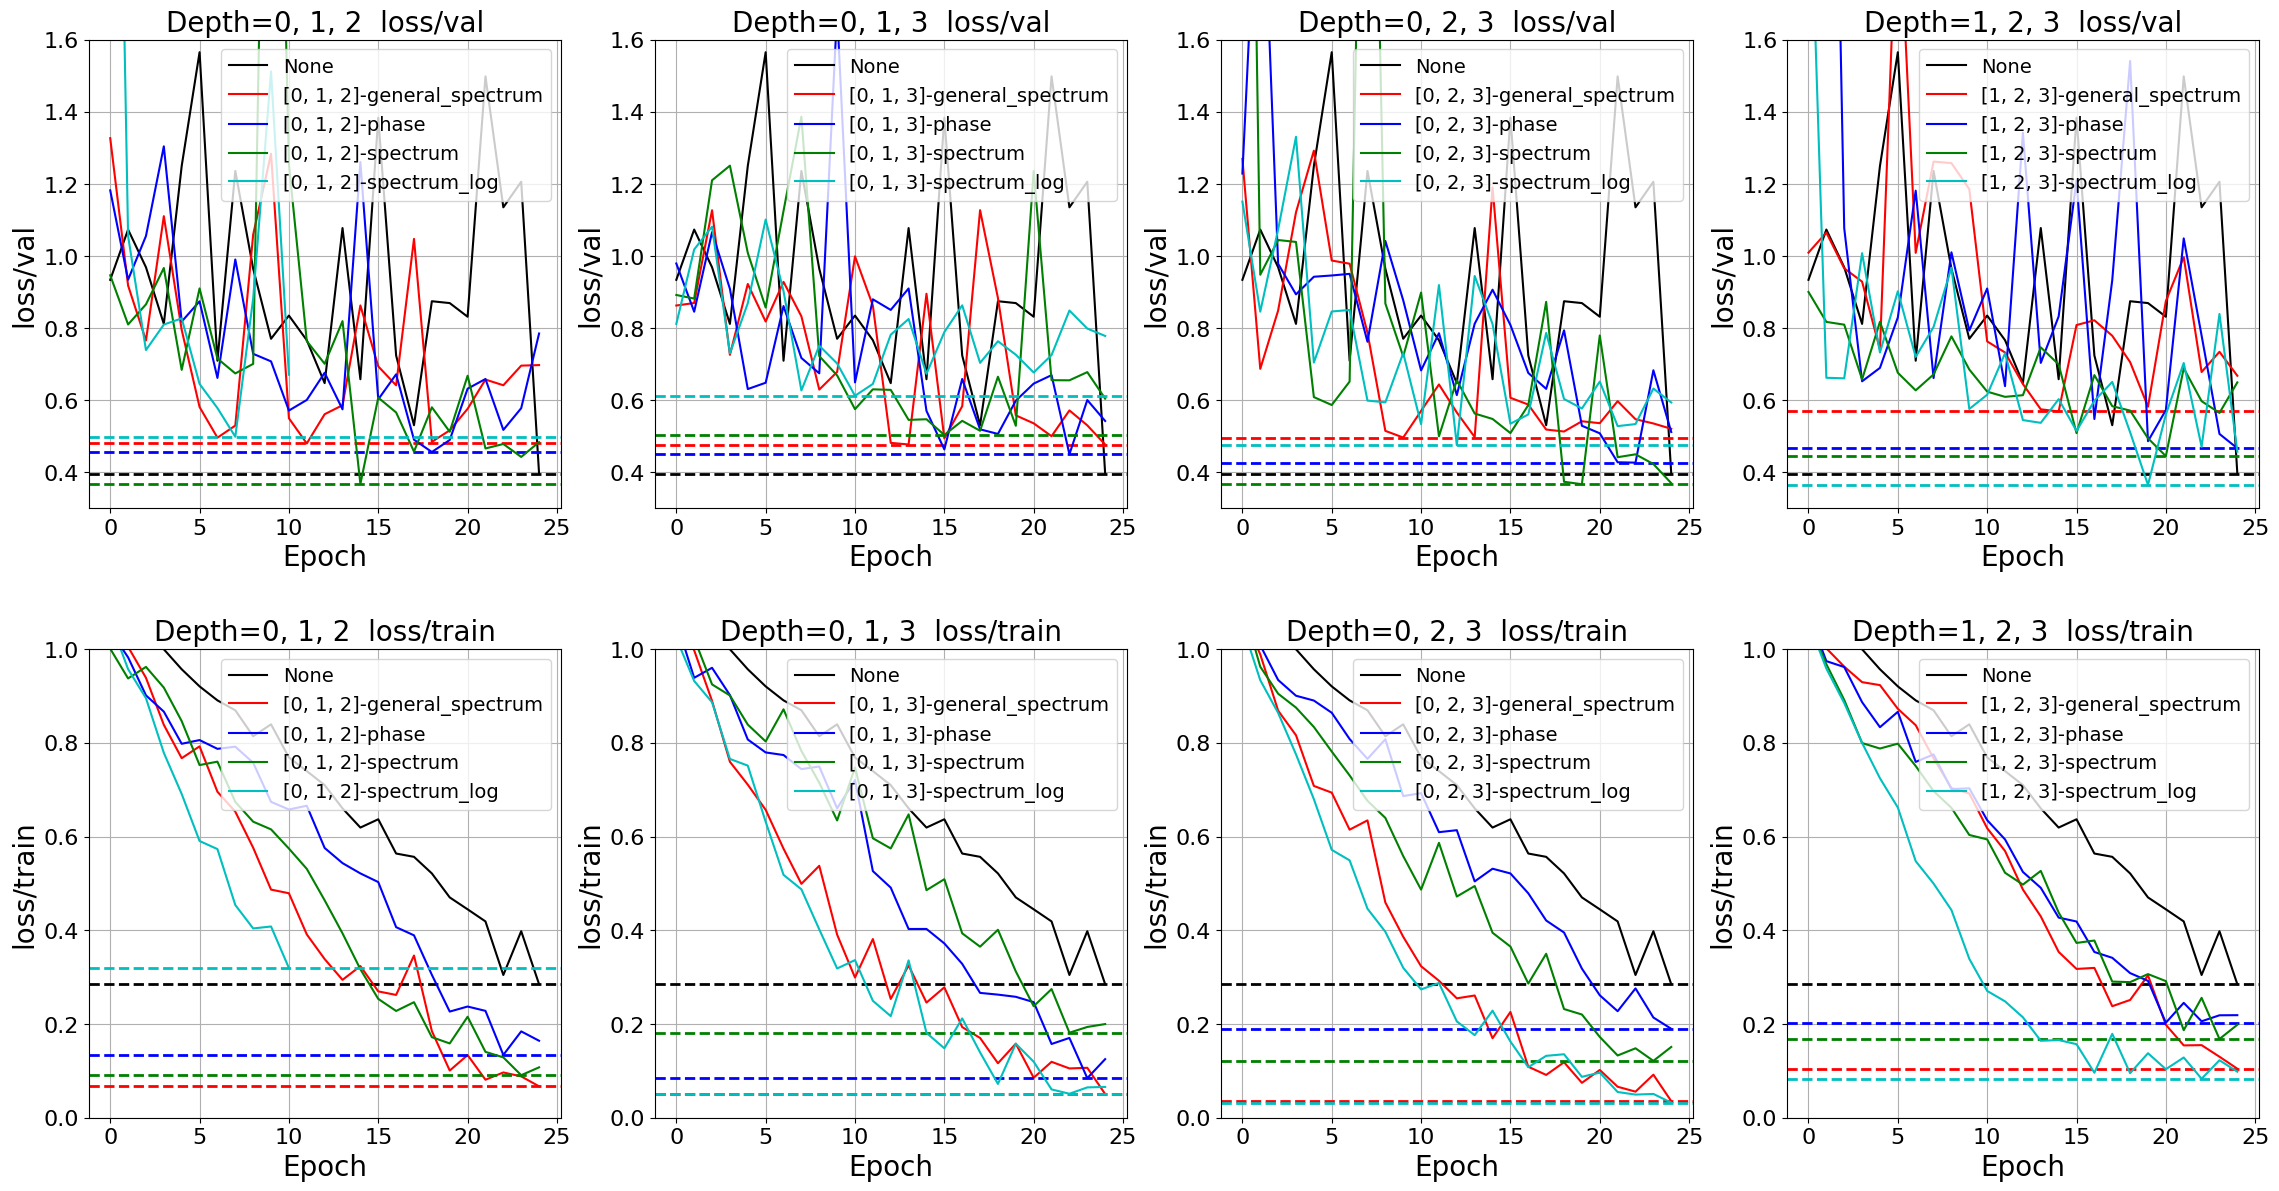

In [31]:
cols_plot_2_plots = (['F1Score_NvsB/val', 'F1Score_BvsM/val'], ['loss/val', 'loss/train'])


for f1_or_loss, cols_plot in enumerate(cols_plot_2_plots):
    # 4 rows for 4 depths of 1 gafl layer
    # 4 columns for 2 metrics on val, loss on val, train
    fig, axs2d = plt.subplots(2, 4, figsize=(28, 7*2 ), )
    colors = ['black','r', 'b', 'g', 'c', 'm', 'y']

    from itertools import combinations
    combinations_2gafls = list(combinations(range(4), 3))
    combinations_2gafls = [ str(val)[1:-1] for val in combinations_2gafls]

    for row_subplot_i, depth_ in enumerate(combinations_2gafls):
        axs = axs2d[0][row_subplot_i] , axs2d[1][row_subplot_i] 
    #     axs.set_title('Title', pad=20)


    #     axs.suptitle(f'Depth={depth_} GAFL vs None', fontsize=SUBFONTSIZE)

        # models_names_to_plot
        mntp = {}
        mntp["no-init"] = [
            'ResNet',
            f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
            f'ResNet_adaptive_[[{depth_}], []]_phase',
            f'ResNet_adaptive_[[{depth_}], []]_spectrum',
            f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
        ]



        labels = ['None',]
        # 1st one is just ResNet
        MNTP_ = mntp["no-init"]
        # get rest of the labels in the format multi_gafl-filter_type
        labels_rest  = [ 
            mntp_.split('_')[2][1:-5] + '-' \
          + mntp_.split(']')[-1][1:] \
            for mntp_ in MNTP_[1:]
        ]
        labels += labels_rest

        cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

        for ax_i, cols_plot_i_ in enumerate(cols_plot):
            for i, model_name_ in enumerate(MNTP_):
                axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)

                if cols_plot_i_.split('//')[0][:4] == 'loss':
                    axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
                else:
                    axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

            axs[ax_i].set_ylabel(cols_plot[ax_i], fontsize=SUBFONTSIZE)
            axs[ax_i].set_title(cols_plot_names[ax_i], fontsize=SUBFONTSIZE)
            
            Y_LIM_ = ([Y_LIMS_1_SCORES, Y_LIMS_1_LOSS])[f1_or_loss]
            if Y_LIM_[ax_i] is not None:
                axs[ax_i].set_ylim(Y_LIM_[ax_i])

        for ax in axs:
            ax.grid()
            ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
            ax.legend(fontsize=FONTSIZE_LEGEND)
            ax.tick_params(labelsize=SUBFONTSIZE//1.2)

    # plt.tight_layout()
    # fig.suptitle('MAIN TITLE', fontsize=24)
    plt.subplots_adjust(hspace = 0.3)
    plt.show();

## (4) 4 GAFLs vs None

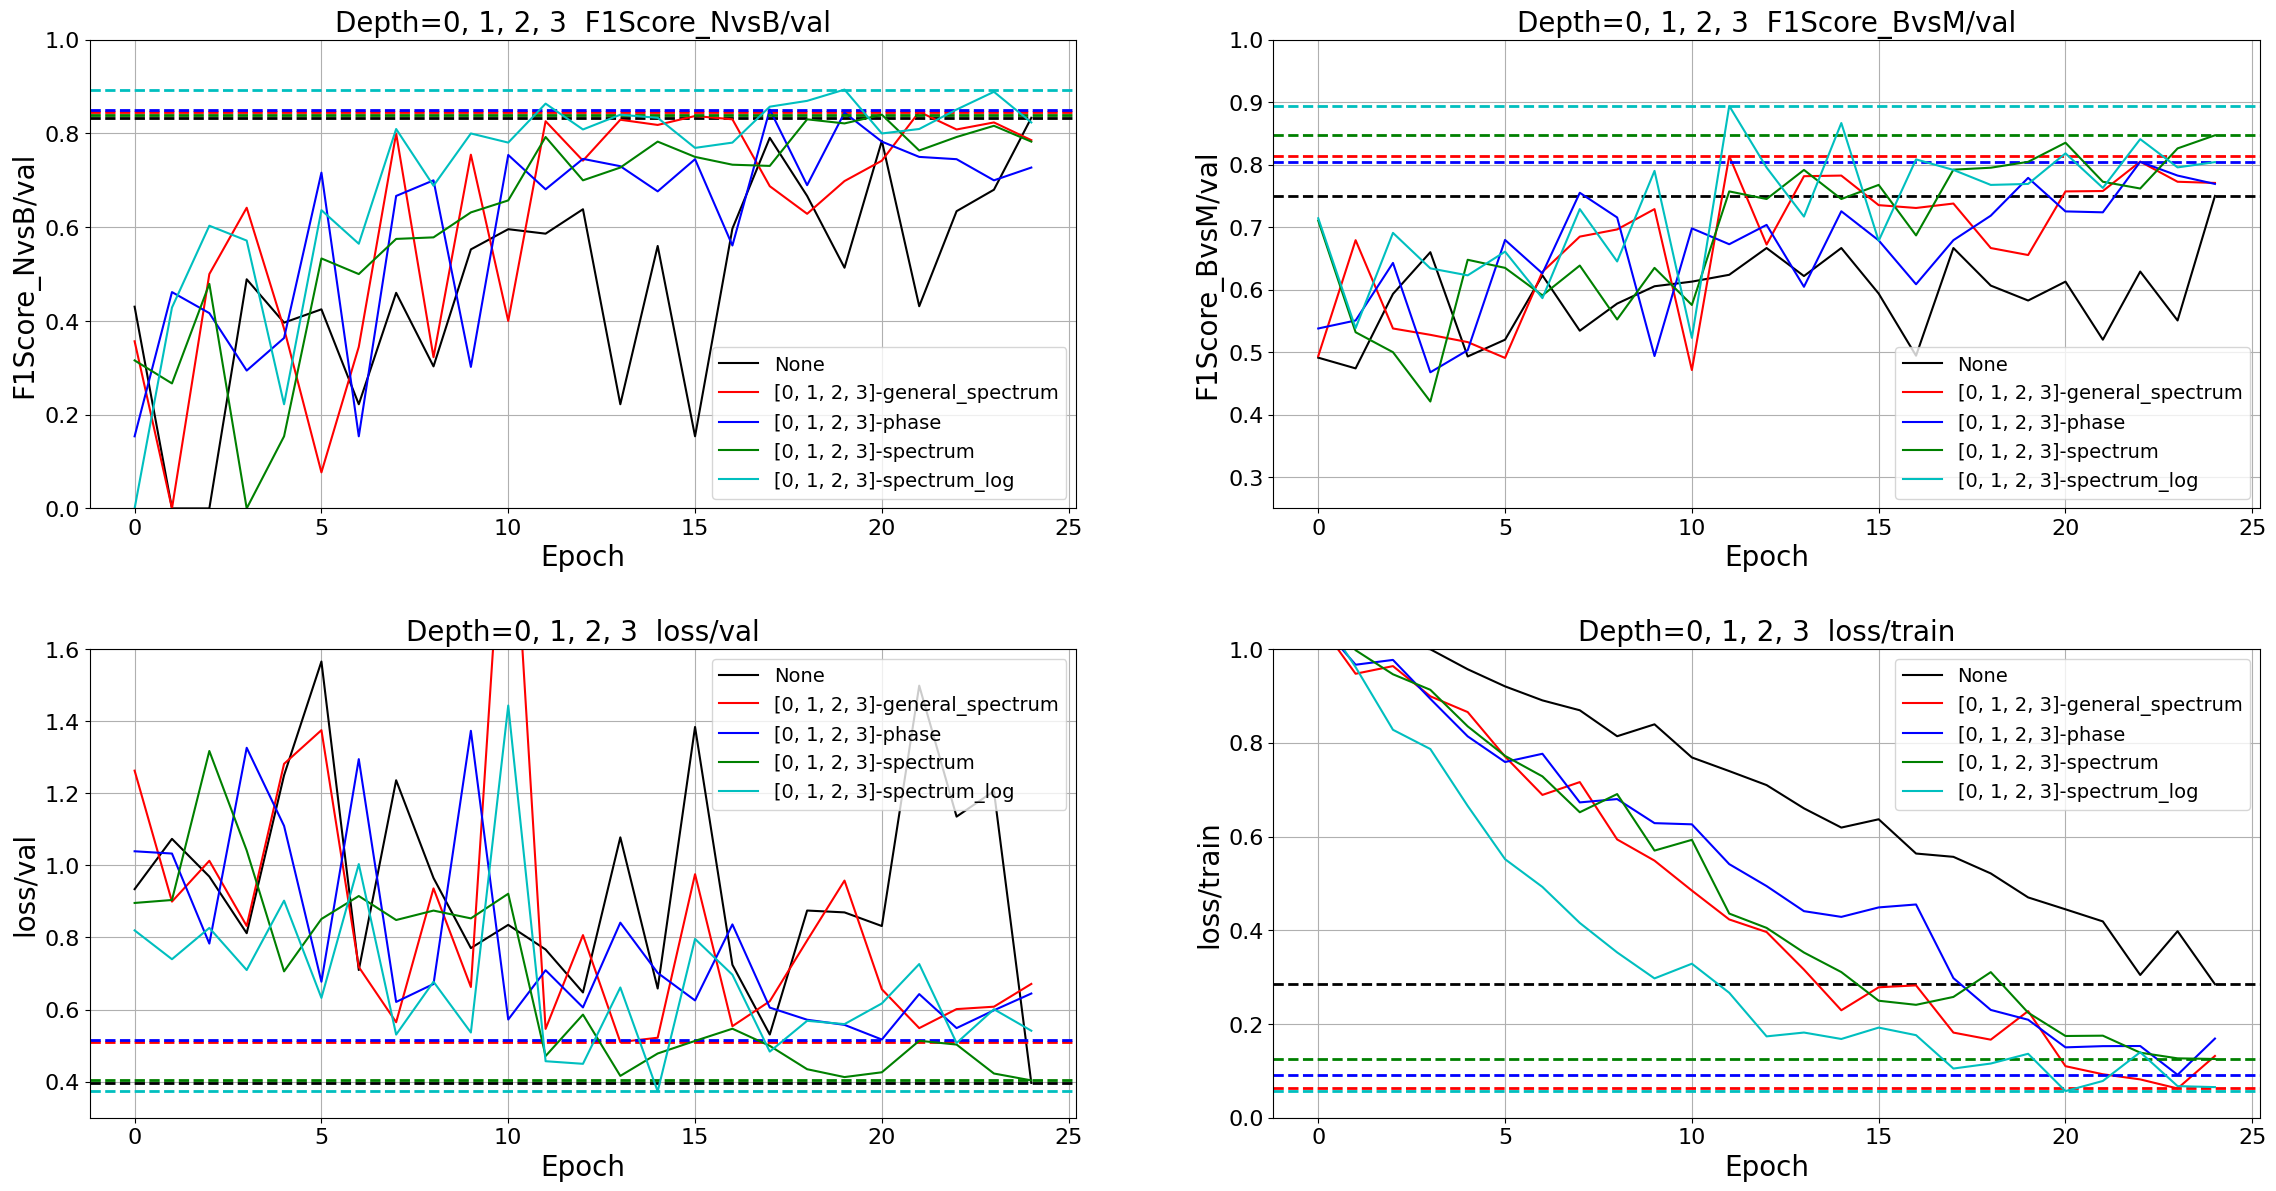

In [32]:
cols_plot_2_plots = (['F1Score_NvsB/val', 'F1Score_BvsM/val'],['loss/val', 'loss/train'])

fig, axs2d = plt.subplots(2, 2, figsize=(28, 7*2 ), )
colors = ['black','r', 'b', 'g', 'c', 'm', 'y']
    
for f1_or_loss, cols_plot in enumerate(cols_plot_2_plots):
    from itertools import combinations
    combinations_2gafls = list(combinations(range(4), 4))
    combinations_2gafls = [ str(val)[1:-1] for val in combinations_2gafls]

    for row_subplot_i, depth_ in enumerate(combinations_2gafls):
        axs = axs2d[f1_or_loss]
        # models_names_to_plot
        mntp = {}
        mntp["no-init"] = [
            'ResNet',
            f'ResNet_adaptive_[[{depth_}], []]_general_spectrum',
            f'ResNet_adaptive_[[{depth_}], []]_phase',
            f'ResNet_adaptive_[[{depth_}], []]_spectrum',
            f'ResNet_adaptive_[[{depth_}], []]_spectrum_log',
        ]



        labels = ['None',]
        # 1st one is just ResNet
        MNTP_ = mntp["no-init"]
        # get rest of the labels in the format multi_gafl-filter_type
        labels_rest  = [ 
            mntp_.split('_')[2][1:-5] + '-' \
          + mntp_.split(']')[-1][1:] \
            for mntp_ in MNTP_[1:]
        ]
        labels += labels_rest

        cols_plot_names = list(map(lambda x: f"Depth={depth_}  "+x, cols_plot))

        for ax_i, cols_plot_i_ in enumerate(cols_plot):
            for i, model_name_ in enumerate(MNTP_):
                axs[ax_i].plot(logs_df[model_name_][cols_plot_i_], label=labels[i], color=colors[i],)

                if cols_plot_i_.split('//')[0][:4] == 'loss':
                    axs[ax_i].axhline(min(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])
                else:
                    axs[ax_i].axhline(max(logs_df[model_name_][cols_plot_i_]), linestyle='--', linewidth=2, color=colors[i])

            axs[ax_i].set_ylabel(cols_plot[ax_i], fontsize=SUBFONTSIZE)
            axs[ax_i].set_title(cols_plot_names[ax_i], fontsize=SUBFONTSIZE)
            
            Y_LIM_ = ([Y_LIMS_1_SCORES, Y_LIMS_1_LOSS])[f1_or_loss]
            if Y_LIM_[ax_i] is not None:
                axs[ax_i].set_ylim(Y_LIM_[ax_i])

        for ax in axs:
            ax.grid()
            ax.set_xlabel('Epoch', fontsize=SUBFONTSIZE)    
            ax.legend(fontsize=FONTSIZE_LEGEND)
            ax.tick_params(labelsize=SUBFONTSIZE//1.2)

# plt.tight_layout()
# fig.suptitle('MAIN TITLE', fontsize=24)
plt.subplots_adjust(hspace = 0.3)
plt.show();